# **📝 Project Title**

## **📌 Objective**
- Find usefull insights from ecommerce_product_performance dataset

## **📂 Dataset Information**
- Essential libaries
- Dataset source
- Important features


In [1]:
import pandas as pd
import numpy as np
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"ecommerce_product_performance.csv")

In [6]:
pd.Series(df.columns)

0         Product_Price
1         Discount_Rate
2        Product_Rating
3     Number_of_Reviews
4    Stock_Availability
5       Days_to_Deliver
6           Return_Rate
7           Category_ID
dtype: object

## **📊 Exploratory Data Analysis (EDA)**

In [16]:
df.head()

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.0,1.0,9.0,0.185116,5.0
1,136.173570,0.041467,3.033534,201.0,1.0,3.0,0.384639,10.0
2,214.768854,0.276197,2.866881,479.0,1.0,19.0,0.056410,4.0
3,302.302986,0.094254,4.473473,252.0,1.0,11.0,NaN,7.0
4,126.584663,0.411845,3.553082,671.0,1.0,14.0,0.672163,6.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_Price       5 non-null      float64
 1   Discount_Rate       5 non-null      float64
 2   Product_Rating      5 non-null      float64
 3   Number_of_Reviews   5 non-null      float64
 4   Stock_Availability  5 non-null      float64
 5   Days_to_Deliver     5 non-null      float64
 6   Return_Rate         4 non-null      float64
 7   Category_ID         5 non-null      float64
dtypes: float64(8)
memory usage: 452.0 bytes


In [13]:
df.describe()

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
count,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,4.000000,5.000000
mean,195.900297,0.200157,3.667608,333.000000,1.0,11.200000,0.324582,6.400000
std,70.823222,0.147925,0.751413,241.343117,0.0,5.932959,0.268195,2.302173
min,126.584663,0.041467,2.866881,62.000000,1.0,3.000000,0.056410,4.000000
25%,136.173570,0.094254,3.033534,201.000000,1.0,9.000000,0.152939,5.000000
50%,199.671415,0.177024,3.553082,252.000000,1.0,11.000000,0.284877,6.000000
75%,214.768854,0.276197,4.411071,479.000000,1.0,14.000000,0.456520,7.000000
max,302.302986,0.411845,4.473473,671.000000,1.0,19.000000,0.672163,10.000000


In [15]:
df.count()

Product_Price         5
Discount_Rate         5
Product_Rating        5
Number_of_Reviews     5
Stock_Availability    5
Days_to_Deliver       5
Return_Rate           4
Category_ID           5
dtype: int64

## **🧹 Data Cleaning**
- Handling missing values
- Encoding, scaling, etc.

In [4]:
df1 = df.copy()

In [23]:
df1.isnull().sum()

Product_Price         0
Discount_Rate         0
Product_Rating        0
Number_of_Reviews     0
Stock_Availability    0
Days_to_Deliver       0
Return_Rate           1
Category_ID           0
dtype: int64

In [28]:
df1.fillna(df1["Return_Rate"].mean())

,Product_Price,Discount_Rate,Product_Rating,Number_of_Reviews,Stock_Availability,Days_to_Deliver,Return_Rate,Category_ID
0,199.671415,0.177024,4.411071,62.0,1.0,9.0,0.185116,5.0
1,136.173570,0.041467,3.033534,201.0,1.0,3.0,0.384639,10.0
2,214.768854,0.276197,2.866881,479.0,1.0,19.0,0.056410,4.0
3,302.302986,0.094254,4.473473,252.0,1.0,11.0,0.324582,7.0
4,126.584663,0.411845,3.553082,671.0,1.0,14.0,0.672163,6.0


# **📊Analytical Questions**

## 📊Sales & Prcing Analysis

### Q:1 How does Product_Price vary across different Discount_Rate?

In [35]:
df1[["Product_Price","Discount_Rate"]].corr()

,Product_Price,Discount_Rate
Product_Price,1.000000,-0.360714
Discount_Rate,-0.360714,1.000000


#### No relation b\w Product_Price and Discount_Rate

### Q:2  Do products with higher Discount_Rate sell faster or have fewer Days_to_Deliver?

In [36]:
df[["Discount_Rate", "Days_to_Deliver"]].corr()

,Discount_Rate,Days_to_Deliver
Discount_Rate,1.000,0.729
Days_to_Deliver,0.729,1.000


#### Strong positive relation

## ⭐Product Performance

### Q:1 What is the relationship between Product_Price and Product_Rating?

In [37]:
df1[["Product_Price", "Product_Rating"]].corr()

,Product_Price,Product_Rating
Product_Price,1.000000,0.560206
Product_Rating,0.560206,1.000000


#### Positive modrate relation

### Q:2 What is the relationship between Product_Price and Number_of_Reviews?

In [39]:
df1[["Product_Rating", "Number_of_Reviews"]].corr()

,Product_Rating,Number_of_Reviews
Product_Rating,1.00000,-0.46688
Number_of_Reviews,-0.46688,1.00000


#### Negetive relation

### Q:3 Which Category_ID has the highest average Product_Rating?

In [7]:
df1.groupby("Category_ID")["Product_Rating"].mean().idxmax()

7.0

#### The id number 7 is the highest average Product_Rating.

## 📦 Inventory & Logistics

### Q:1 Does Stock_Availability affect the Return_Rate?

In [9]:
df1.groupby("Stock_Availability")["Return_Rate"].mean()

Stock_Availability
0.0    0.327099
1.0    0.330449
Name: Return_Rate, dtype: float64

#### No the Stock_Availability not affect the Return_Rate.

### Q:2 Which categories have products that are more frequently out of stock?


In [29]:
out_of_stock = df1[df1["Stock_Availability"] == 0]
out_of_stock_counts = out_of_stock.groupby("Category_ID").size()
out_of_stock_sorted = out_of_stock_counts.sort_values(ascending = False)
out_of_stock_sorted.iloc[0:2]

Category_ID
6.0    21
9.0    21
dtype: int64

#### IDs 6 and 9 are in high demand and out of stock.

### Q:3 What is the average Days_to_Deliver for each Category_ID?

In [27]:
df1.groupby("Category_ID")["Days_to_Deliver"].mean().sort_values(ascending = False)

Category_ID
3.0     16.187135
5.0     16.168539
6.0     16.094737
2.0     15.752941
1.0     15.678161
9.0     15.666667
10.0    15.484848
4.0     14.947977
8.0     14.440000
7.0     14.411168
Name: Days_to_Deliver, dtype: float64

## 📊👥Customer Behavior


### Q:1 Do those with a higher Number_of_Reviews also have a higher or lower Return Rate?

In [27]:
df1[["Number_of_Reviews","Return_Rate"]].corr()

,Number_of_Reviews,Return_Rate
Number_of_Reviews,1.000000,0.018646
Return_Rate,0.018646,1.000000


#### Reviews are not effected on Return_Rate. Both variables are mostly independent.

### Q:2 Are products with low Product Ratings returned more often?

In [31]:
df1[["Product_Rating","Return_Rate"]].corr()

,Product_Rating,Return_Rate
Product_Rating,1.000000,0.015189
Return_Rate,0.015189,1.000000


#### No change

### Q:3 Does Discount Rate have any effect on the Return Rate?

In [32]:
df1[["Discount_Rate","Return_Rate"]].corr()

,Discount_Rate,Return_Rate
Discount_Rate,1.000000,0.034367
Return_Rate,0.034367,1.000000


#### No relation means the Discount Rate have no any effect on the Return Rate.

## 📊Advanced Analysis 

### Q:1 Can we predict the Return Rate using Product Price, Discount Rate, and Product Rating?

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
features = ["Product_Price", "Discount_Rate", "Product_Rating", "Number_of_Reviews", "Days_to_Deliver", "Stock_Availability"]
df_model = df[features + ["Return_Rate"]].dropna()

X = df_model[features]
y = df_model["Return_Rate"]
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

y_pred = model.predict(X)
print("R2 Score:", r2_score(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))

R2 Score: 0.8532649122284168
MAE: 0.053845392624059074


#### Our this model is working great.

### Q:2 What affects the Days_to_Deliver the most?

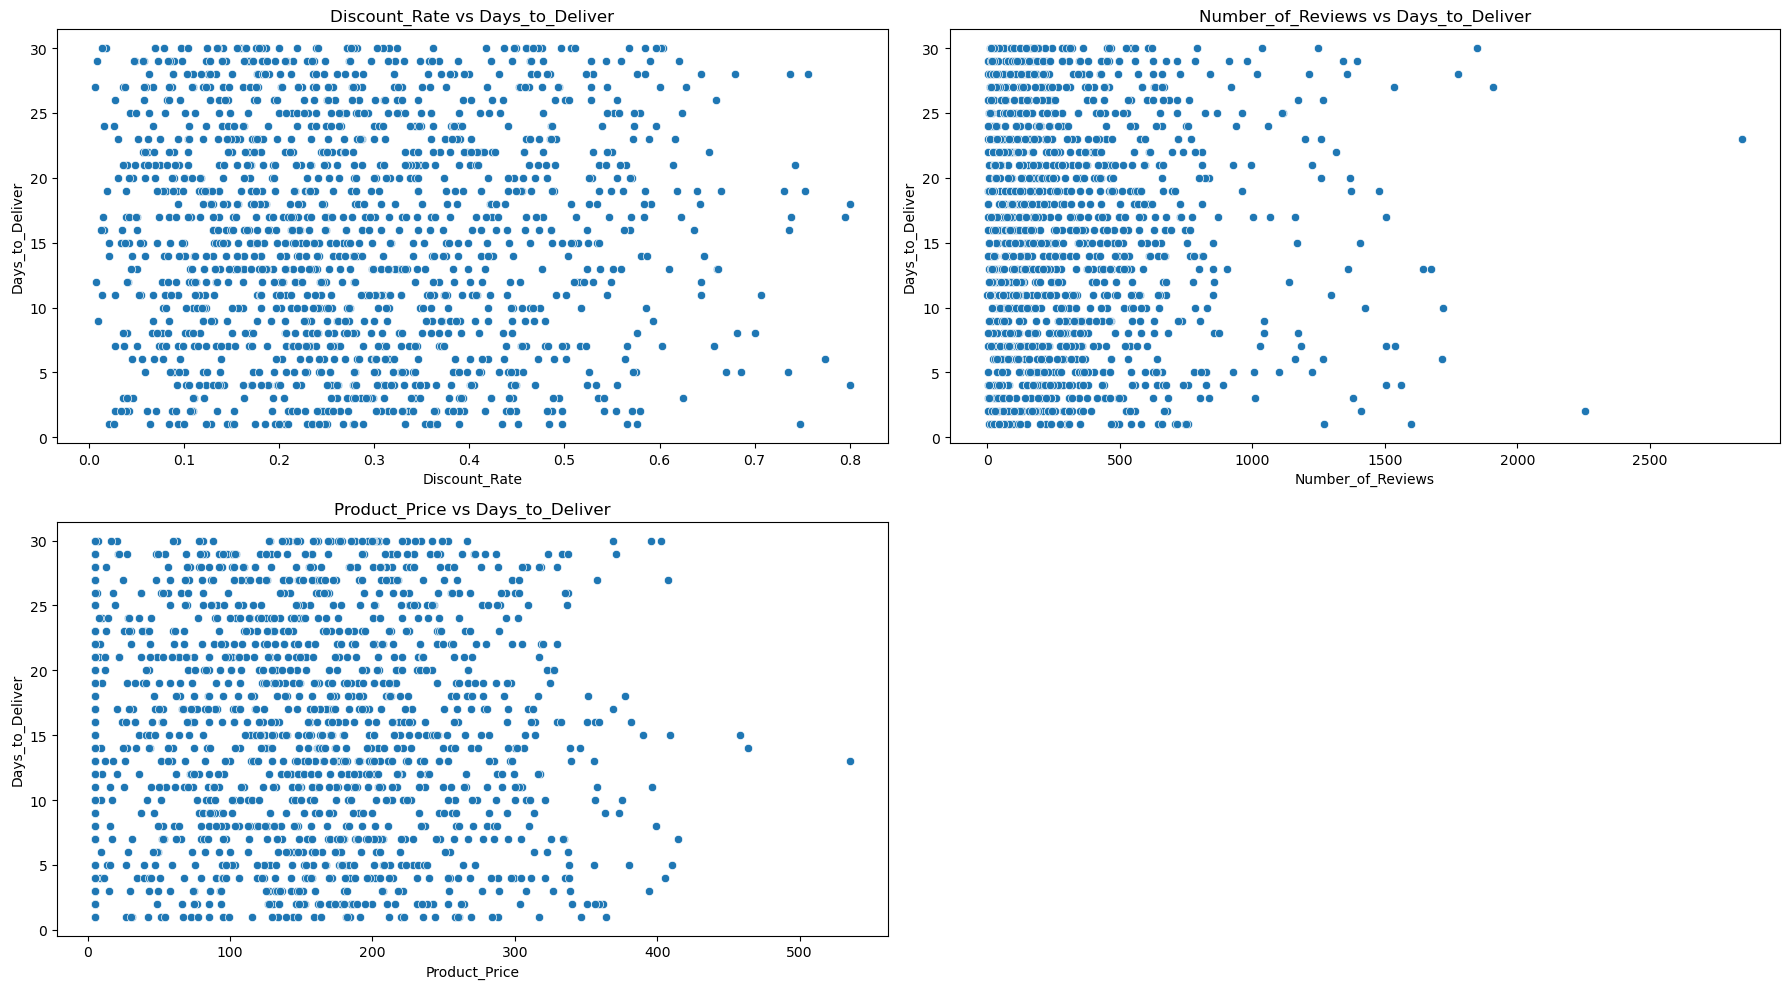

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

# Clean data
features = ["Product_Price", "Discount_Rate", "Product_Rating", "Number_of_Reviews", "Stock_Availability"]
df_clean = df.dropna(subset=features + ["Days_to_Deliver"])

# Plot setup
plt.figure(figsize=(18, 10))

for i, feature in enumerate(["Discount_Rate", "Number_of_Reviews", "Product_Price"], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_clean[feature], y=df_clean["Days_to_Deliver"])
    plt.title(f"{feature} vs Days_to_Deliver")
    plt.xlabel(feature)
    plt.ylabel("Days_to_Deliver")

plt.tight_layout()
plt.show()

#### The summary of these graphs is that the X-axis values are changing, but the Y-axis remains the same with no variation.

### Q:3 What factors determine Stock_Availability?

In [14]:
#Features definge
features = ["Product_Price", "Discount_Rate", "Product_Rating", "Number_of_Reviews", "Days_to_Deliver"]
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
df_clean = df[features + ["Stock_Availability"]].dropna()
X = df_clean[features]
y = df_clean["Stock_Availability"].loc[X.index]
model = RandomForestClassifier(random_state= 42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending = False)
print(importances)

Discount_Rate        0.228369
Product_Rating       0.220578
Number_of_Reviews    0.219860
Product_Price        0.203711
Days_to_Deliver      0.127482
dtype: float64


#### These features do not have a strong effect on Stock_Availability.